In [66]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [67]:

project=pd.read_csv("C:/Users/mailt/OneDrive/Desktop/project/output.csv")

In [68]:
project.describe()

,IP_LEN,FR_LENGHT,IP_ID,IP_RESERVED,IP_DF,IP_MF,IP_OFFSET,IP_CHECKSUM,UDP_SPORT,UDP_DPORT,...,NUM_SYN_SRC_DST,NUM_SYN_DST_SRC,NUM_RST_SRC_DST,NUM_RST_DST_SRC,COUNT_SERV_SRC_DST,COUNT_SERV_DST_SRC,NUM_BYTES_SERV_SRC_DST,NUM_BYTES_SERV_DST_SRC,FIRST_PACKET,FIRST_SERV_PACKET
count,850877.0,850877.000000,850877.000000,850877.0,850877.000000,850877.0,850877.0,850877.000000,850877.000000,850877.000000,...,850877.000000,850877.000000,850877.000000,850877.000000,850877.000000,850877.000000,8.508770e+05,8.508770e+05,850877.000000,850877.000000
mean,20.0,51.526659,16413.039752,0.0,0.501198,0.0,0.0,21111.649746,4.392464,4.392463,...,211907.596789,74.126793,79.343543,211832.970951,212676.140924,212762.859076,9.434943e+06,1.295650e+07,0.499302,0.000657
std,0.0,115.860861,21152.459432,0.0,0.499999,0.0,0.0,17762.922582,472.760987,472.760987,...,122747.537161,6.759283,4.047610,122740.967678,122809.408062,122817.768784,4.977269e+06,7.388708e+06,0.500000,0.025623
min,20.0,40.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,6.000000e+01,0.000000,0.000000
25%,20.0,40.000000,0.000000,0.0,0.000000,0.0,0.0,9420.000000,0.000000,0.000000,...,105606.000000,68.000000,78.000000,105537.000000,106320.000000,106400.000000,5.108572e+06,6.558379e+06,0.000000,0.000000
50%,20.0,60.000000,128.000000,0.0,1.000000,0.0,0.0,9420.000000,0.000000,0.000000,...,211917.000000,74.000000,79.000000,211843.000000,212677.000000,212762.000000,9.443854e+06,1.295002e+07,0.000000,0.000000
75%,20.0,60.000000,32823.000000,0.0,1.000000,0.0,0.0,32815.000000,0.000000,0.000000,...,318212.000000,79.000000,80.000000,318133.000000,319033.000000,319125.000000,1.371011e+07,1.935826e+07,1.000000,0.000000
max,20.0,17428.000000,65535.000000,0.0,1.000000,0.0,0.0,65534.000000,60847.000000,60847.000000,...,424504.000000,86.000000,86.000000,424418.000000,425388.000000,425489.000000,1.808675e+07,2.575610e+07,1.000000,1.000000


In [69]:
cols=list(project.columns)
len(cols)

51

In [70]:
project.isnull().sum()

IP_TYPE                   0
IP_LEN                    0
FR_LENGHT                 0
IP_ID                     0
IP_RESERVED               0
IP_DF                     0
IP_MF                     0
IP_OFFSET                 0
IP_PROTO                  0
IP_CHECKSUM               0
UDP_SPORT                 0
UDP_DPORT                 0
UDP_LEN                   0
UDP_CHK                   0
ICMP_TYPE                 0
ICMP_CODE                 0
ICMP_CHK                  0
TCP_SPORT                 0
TCP_DPORT                 0
TCP_SEQ                   0
TCP_ACK                   0
TCP_FFIN                  0
TCP_FSYN                  0
TCP_FRST                  0
TCP_FPUSH                 0
TCP_FACK                  0
TCP_FURG                  0
COUNT_FR_SRC_DST          0
COUNT_FR_DST_SRC          0
NUM_BYTES_SRC_DST         0
NUM_BYTES_DST_SRC         0
NUM_PUSHED_SRC_DST        0
NUM_PUSHED_DST_SRC        0
NUM_SYN_FIN_SRC_DST       0
NUM_SYN_FIN_DST_SRC       0
NUM_FIN_SRC_DST     

In [71]:
project.dtypes

IP_TYPE                   object
IP_LEN                     int64
FR_LENGHT                  int64
IP_ID                      int64
IP_RESERVED                int64
IP_DF                      int64
IP_MF                      int64
IP_OFFSET                  int64
IP_PROTO                  object
IP_CHECKSUM                int64
UDP_SPORT                  int64
UDP_DPORT                  int64
UDP_LEN                    int64
UDP_CHK                    int64
ICMP_TYPE                  int64
ICMP_CODE                  int64
ICMP_CHK                   int64
TCP_SPORT                  int64
TCP_DPORT                  int64
TCP_SEQ                    int64
TCP_ACK                    int64
TCP_FFIN                   int64
TCP_FSYN                   int64
TCP_FRST                   int64
TCP_FPUSH                  int64
TCP_FACK                   int64
TCP_FURG                   int64
COUNT_FR_SRC_DST           int64
COUNT_FR_DST_SRC           int64
NUM_BYTES_SRC_DST          int64
NUM_BYTES_

In [72]:
num_cols = project._get_numeric_data().columns
  
cate_cols = list(set(project.columns)-set(num_cols))
cate_cols.remove('TYPE')
cate_cols.remove('IP_PROTO')
cate_cols

['IP_TYPE', 'CONN_STATUS']

(array([[850877.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.],
        [     0.,      0.,      0., 424590.,      0.,      0.,   1783.,
              0.,      0., 424504.]]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 2 BarContainer objects>)

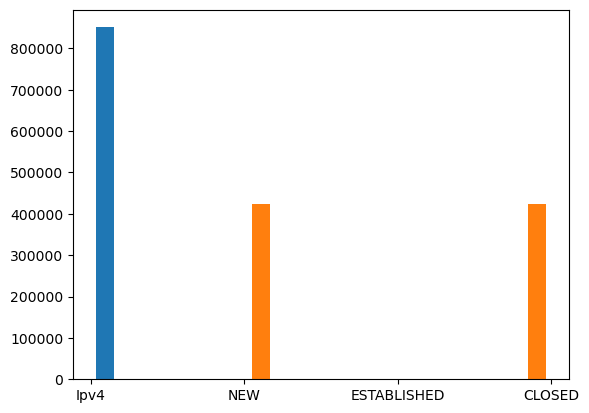

In [73]:
plt.hist(project[cate_cols])

In [74]:
df=project

C:\Users\mailt\AppData\Local\Temp\ipykernel_23128\1436010834.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN


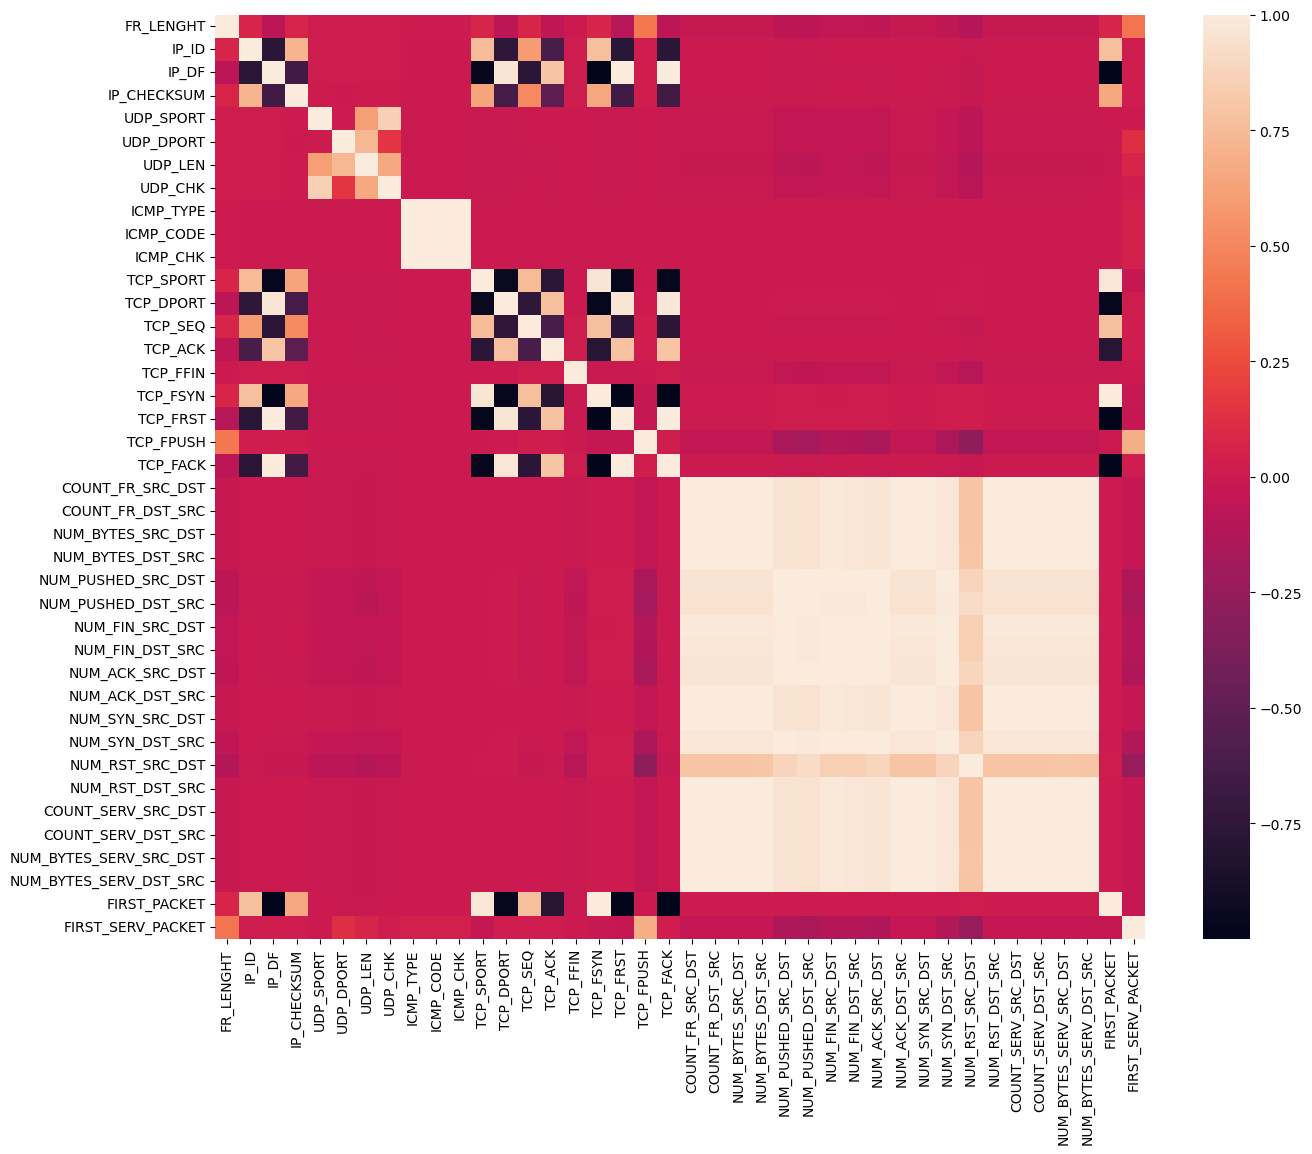

In [75]:
df = df.dropna('columns')# drop columns with NaN
  
df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values
  
corr = df.corr()
  
plt.figure(figsize =(15, 12))
  
sns.heatmap(corr)
  
plt.show()
 

In [76]:
cor_matrix = df.corr().abs()
print(cor_matrix)

                        FR_LENGHT     IP_ID     IP_DF  IP_CHECKSUM  UDP_SPORT  \
FR_LENGHT                1.000000  0.073840  0.072969     0.068328   0.008722   
IP_ID                    0.073840  1.000000  0.770886     0.713256   0.011267   
IP_DF                    0.072969  0.770886  1.000000     0.653497   0.009269   
IP_CHECKSUM              0.068328  0.713256  0.653497     1.000000   0.005792   
UDP_SPORT                0.008722  0.011267  0.009269     0.005792   1.000000   
UDP_DPORT                0.010977  0.011727  0.009269     0.002863   0.006221   
UDP_LEN                  0.015082  0.015972  0.012777     0.001360   0.605871   
UDP_CHK                  0.009578  0.011833  0.009581     0.004564   0.855493   
ICMP_TYPE                0.004907  0.000048  0.001087     0.000703   0.000010   
ICMP_CODE                0.004907  0.000048  0.001087     0.000703   0.000010   
ICMP_CHK                 0.004907  0.000048  0.001087     0.000703   0.000010   
TCP_SPORT                0.0

In [77]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                        FR_LENGHT    IP_ID     IP_DF  IP_CHECKSUM  UDP_SPORT  \
FR_LENGHT                     NaN  0.07384  0.072969     0.068328   0.008722   
IP_ID                         NaN      NaN  0.770886     0.713256   0.011267   
IP_DF                         NaN      NaN       NaN     0.653497   0.009269   
IP_CHECKSUM                   NaN      NaN       NaN          NaN   0.005792   
UDP_SPORT                     NaN      NaN       NaN          NaN        NaN   
UDP_DPORT                     NaN      NaN       NaN          NaN        NaN   
UDP_LEN                       NaN      NaN       NaN          NaN        NaN   
UDP_CHK                       NaN      NaN       NaN          NaN        NaN   
ICMP_TYPE                     NaN      NaN       NaN          NaN        NaN   
ICMP_CODE                     NaN      NaN       NaN          NaN        NaN   
ICMP_CHK                      NaN      NaN       NaN          NaN        NaN   
TCP_SPORT                     NaN      N

C:\Users\mailt\AppData\Local\Temp\ipykernel_23128\3477284062.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [78]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [79]:
to_drop

['ICMP_CODE',
 'ICMP_CHK',
 'TCP_SPORT',
 'TCP_DPORT',
 'TCP_FSYN',
 'TCP_FRST',
 'TCP_FACK',
 'COUNT_FR_DST_SRC',
 'NUM_BYTES_SRC_DST',
 'NUM_BYTES_DST_SRC',
 'NUM_PUSHED_SRC_DST',
 'NUM_PUSHED_DST_SRC',
 'NUM_FIN_SRC_DST',
 'NUM_FIN_DST_SRC',
 'NUM_ACK_SRC_DST',
 'NUM_ACK_DST_SRC',
 'NUM_SYN_SRC_DST',
 'NUM_SYN_DST_SRC',
 'NUM_RST_DST_SRC',
 'COUNT_SERV_SRC_DST',
 'COUNT_SERV_DST_SRC',
 'NUM_BYTES_SERV_SRC_DST',
 'NUM_BYTES_SERV_DST_SRC',
 'FIRST_PACKET']

In [80]:
df1 = df.drop(to_drop, axis=1)

In [81]:
df1.describe()

,FR_LENGHT,IP_ID,IP_DF,IP_CHECKSUM,UDP_SPORT,UDP_DPORT,UDP_LEN,UDP_CHK,ICMP_TYPE,TCP_SEQ,TCP_ACK,TCP_FFIN,TCP_FPUSH,COUNT_FR_SRC_DST,NUM_RST_SRC_DST,FIRST_SERV_PACKET
count,850877.000000,850877.000000,850877.000000,850877.000000,850877.000000,850877.000000,850877.000000,850877.000000,850877.000000,850877.000000,8.508770e+05,850877.000000,850877.000000,850877.000000,850877.000000,850877.000000
mean,51.526659,16413.039752,0.501198,21111.649746,4.392464,4.392463,0.027548,3.746496,0.000004,16417.410437,4.448206e+06,0.000136,0.000896,212762.859076,79.343543,0.000657
std,115.860861,21152.459432,0.499999,17762.922582,472.760987,472.760987,2.150889,390.115193,0.003252,21162.842884,5.610141e+06,0.011675,0.029912,122817.768784,4.047610,0.025623
min,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000
25%,40.000000,0.000000,0.000000,9420.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,106400.000000,78.000000,0.000000
50%,60.000000,128.000000,1.000000,9420.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,2.385480e+05,0.000000,0.000000,212762.000000,79.000000,0.000000
75%,60.000000,32823.000000,1.000000,32815.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32848.000000,8.895936e+06,0.000000,0.000000,319125.000000,80.000000,0.000000
max,17428.000000,65535.000000,1.000000,65534.000000,60847.000000,60847.000000,292.000000,65400.000000,3.000000,65535.000000,1.780836e+07,1.000000,1.000000,425489.000000,86.000000,1.000000


In [82]:
df1

,FR_LENGHT,IP_ID,IP_DF,IP_PROTO,IP_CHECKSUM,UDP_SPORT,UDP_DPORT,UDP_LEN,UDP_CHK,ICMP_TYPE,TCP_SEQ,TCP_ACK,TCP_FFIN,TCP_FPUSH,COUNT_FR_SRC_DST,NUM_RST_SRC_DST,FIRST_SERV_PACKET,CONN_STATUS,TYPE
0,60,8006,1,TCP,1394,0,0,0,0,0,38347,0,0,0,1,0,0,NEW,Attack
1,60,0,1,TCP,9400,0,0,0,0,0,21445,11253196,0,0,1,0,1,NEW,Normal
2,52,8007,1,TCP,1401,0,0,0,0,0,38348,1852358,0,0,2,0,0,ESTABLISHED,Attack
3,60,29891,1,TCP,44020,0,0,0,0,0,61247,0,0,0,3,0,0,NEW,Attack
4,60,0,1,TCP,8376,0,0,0,0,0,20731,2158400,0,0,3,0,1,NEW,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850872,40,0,1,TCP,9420,0,0,0,0,0,0,11313219,0,0,425487,86,0,CLOSED,Normal
850873,60,23437,0,TCP,2347,0,0,0,0,0,35589,0,0,0,425488,86,0,NEW,Attack
850874,40,0,1,TCP,9420,0,0,0,0,0,0,8739590,0,0,425488,86,0,CLOSED,Normal
850875,60,11113,0,TCP,14671,0,0,0,0,0,32264,0,0,0,425489,86,0,NEW,Attack


In [83]:
fmap={'NEW':1,'CLOSED':2,'ESTABLISHED':3}
df1['CONN_STATUS']=df1['CONN_STATUS'].map(fmap)

In [84]:
df1['TYPE']=df1['TYPE'].astype('string')

In [85]:
df1['IP_PROTO']=df1['IP_PROTO'].astype('string')

In [86]:
df1.dtypes

FR_LENGHT             int64
IP_ID                 int64
IP_DF                 int64
IP_PROTO             string
IP_CHECKSUM           int64
UDP_SPORT             int64
UDP_DPORT             int64
UDP_LEN               int64
UDP_CHK               int64
ICMP_TYPE             int64
TCP_SEQ               int64
TCP_ACK               int64
TCP_FFIN              int64
TCP_FPUSH             int64
COUNT_FR_SRC_DST      int64
NUM_RST_SRC_DST       int64
FIRST_SERV_PACKET     int64
CONN_STATUS           int64
TYPE                 string
dtype: object

In [88]:
df1.to_csv('best1.csv')

In [89]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



In [90]:
y=df1[['TYPE']]
x=df1.drop(['TYPE','IP_PROTO'],axis=1)
x

,FR_LENGHT,IP_ID,IP_DF,IP_CHECKSUM,UDP_SPORT,UDP_DPORT,UDP_LEN,UDP_CHK,ICMP_TYPE,TCP_SEQ,TCP_ACK,TCP_FFIN,TCP_FPUSH,COUNT_FR_SRC_DST,NUM_RST_SRC_DST,FIRST_SERV_PACKET,CONN_STATUS
0,60,8006,1,1394,0,0,0,0,0,38347,0,0,0,1,0,0,1
1,60,0,1,9400,0,0,0,0,0,21445,11253196,0,0,1,0,1,1
2,52,8007,1,1401,0,0,0,0,0,38348,1852358,0,0,2,0,0,3
3,60,29891,1,44020,0,0,0,0,0,61247,0,0,0,3,0,0,1
4,60,0,1,8376,0,0,0,0,0,20731,2158400,0,0,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850872,40,0,1,9420,0,0,0,0,0,0,11313219,0,0,425487,86,0,2
850873,60,23437,0,2347,0,0,0,0,0,35589,0,0,0,425488,86,0,1
850874,40,0,1,9420,0,0,0,0,0,0,8739590,0,0,425488,86,0,2
850875,60,11113,0,14671,0,0,0,0,0,32264,0,0,0,425489,86,0,1


In [91]:
sc = MinMaxScaler()
x = sc.fit_transform(x)
  
# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(570087, 17) (280790, 17)
(570087, 1) (280790, 1)


In [92]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clfg = GaussianNB()
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = clfg.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)


print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:", clfg.score(X_test, y_test))



Training time:  0.8466770648956299
Testing time:  0.24017620086669922
Train score is: 0.9993334350721907
Test score is: 0.9992449873570997


Accuracy  0.9992449873570997
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00    140306
      Normal       1.00      1.00      1.00    140484

    accuracy                           1.00    280790
   macro avg       1.00      1.00      1.00    280790
weighted avg       1.00      1.00      1.00    280790



<AxesSubplot:>

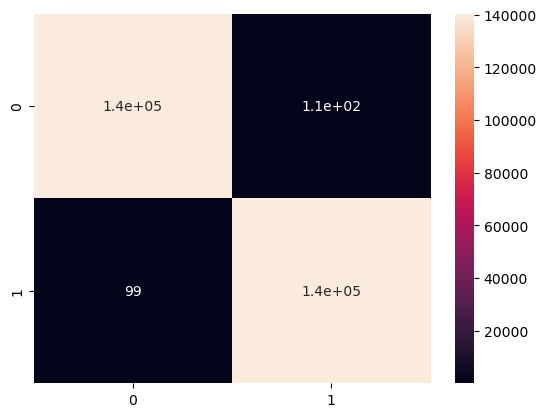

In [93]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

pred = clfg.predict(X_test)
print('Accuracy ',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [94]:

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)


start_time = time.time()
y_test_pred = clfd.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)


print("Train score is:", clfd.score(X_train, y_train))
print("Test score is:", clfd.score(X_test, y_test))



Training time:  1.5850307941436768
Testing time:  0.04646468162536621
Train score is: 0.9995807657427725
Test score is: 0.9995655115922931


Accuracy  0.9995655115922931
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00    140306
      Normal       1.00      1.00      1.00    140484

    accuracy                           1.00    280790
   macro avg       1.00      1.00      1.00    280790
weighted avg       1.00      1.00      1.00    280790



<AxesSubplot:>

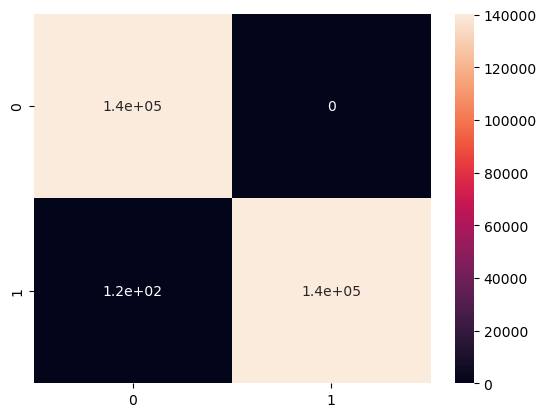

In [95]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

pred = clfd.predict(X_test)
print('Accuracy ',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [96]:

from sklearn.ensemble import RandomForestClassifier

clfr = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)


start_time = time.time()
y_test_pred = clfr.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)



print("Train score is:", clfr.score(X_train, y_train))
print("Test score is:", clfr.score(X_test, y_test))



Training time:  9.116121053695679
Testing time:  1.2806715965270996
Train score is: 1.0
Test score is: 0.9999750703372627


Accuracy  0.9999750703372627
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00    140306
      Normal       1.00      1.00      1.00    140484

    accuracy                           1.00    280790
   macro avg       1.00      1.00      1.00    280790
weighted avg       1.00      1.00      1.00    280790



<AxesSubplot:>

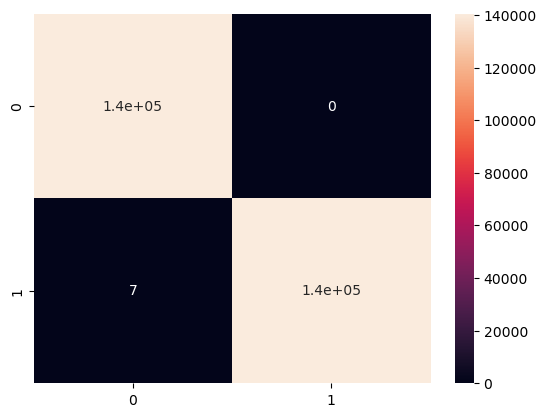

In [97]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

pred = clfr.predict(X_test)
print('Accuracy ',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [98]:
from sklearn.svm import SVC
  
clfs = SVC(gamma = 'scale')
start_time = time.time()
clfs.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = clfs.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

print("Train score is:", clfs.score(X_train, y_train))
print("Test score is:", clfs.score(X_test, y_test))

Training time:  25.29870915412903
Testing time:  23.65485382080078
Train score is: 0.9996070775162388
Test score is: 0.9995619502119021


Accuracy  0.9995619502119021
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00    140306
      Normal       1.00      1.00      1.00    140484

    accuracy                           1.00    280790
   macro avg       1.00      1.00      1.00    280790
weighted avg       1.00      1.00      1.00    280790



<AxesSubplot:>

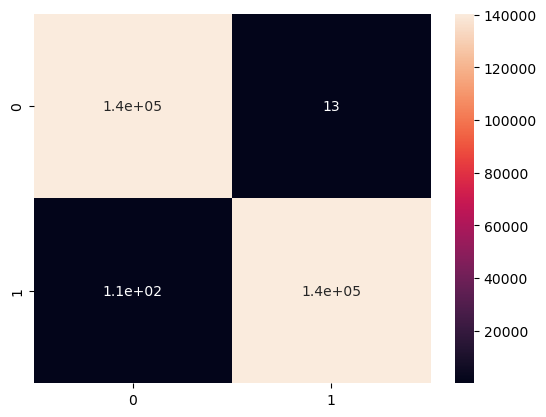

In [99]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

pred = clfs.predict(X_test)
print('Accuracy ',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [100]:
from sklearn.linear_model import LogisticRegression
  
clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = clfl.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)


print("Train score is:", clfl.score(X_train, y_train))
print("Test score is:", clfl.score(X_test, y_test))



Training time:  2.761035203933716
Testing time:  0.029804706573486328
Train score is: 0.9994000915649717
Test score is: 0.9993803198119591


Accuracy  0.9993803198119591
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00    140306
      Normal       1.00      1.00      1.00    140484

    accuracy                           1.00    280790
   macro avg       1.00      1.00      1.00    280790
weighted avg       1.00      1.00      1.00    280790



<AxesSubplot:>

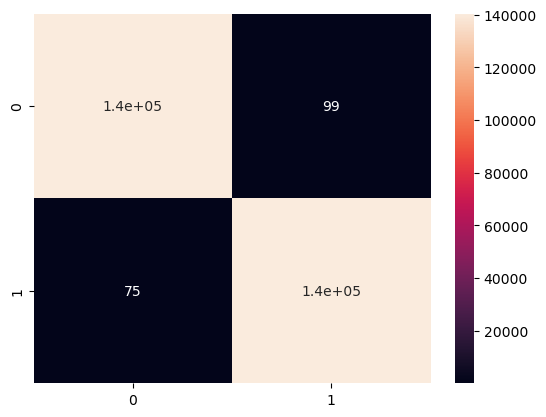

In [101]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

pred = clfl.predict(X_test)
print('Accuracy ',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')